In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
all_btc = pd.read_csv('../Data/BTC-USD.csv')

In [5]:
all_btc.Date = pd.to_datetime(all_btc.Date, format='%Y-%m-%d')
all_btc = all_btc.set_index('Date')

In [6]:
all_btc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-21,322.092010,328.158997,319.595001,326.927002,326.927002,2.820050e+07
2015-11-22,326.975006,327.010010,321.259003,324.536011,324.536011,2.343940e+07
2015-11-23,324.350006,325.118011,321.290009,323.045990,323.045990,2.747890e+07
2015-11-24,323.014008,323.058014,318.118011,320.045990,320.045990,2.936260e+07
2015-11-25,320.045013,329.134003,316.769989,328.205994,328.205994,4.166690e+07
...,...,...,...,...,...,...
2021-11-17,60139.621094,60823.609375,58515.410156,60368.011719,60368.011719,3.917839e+10
2021-11-18,60360.136719,60948.500000,56550.792969,56942.136719,56942.136719,4.138834e+10
2021-11-19,56896.128906,58351.113281,55705.179688,58119.578125,58119.578125,3.870241e+10


In [7]:
#Creating a percent change column for the adjusted close data, as this will likely create
#more stationary data.

all_btc['Percent change'] = all_btc['Adj Close'].pct_change()

In [11]:
#Exploring null values in the adjusted close column in the dataset.

all_btc['Adj Close'].isnull().sum()

4

In [14]:
#Filling null values in the dataframe using their most previous values.

all_btc = all_btc.fillna(method='pad')
all_btc

,Open,High,Low,Close,Adj Close,Volume,Percent change
Date,,,,,,,
2015-11-21,322.092010,328.158997,319.595001,326.927002,326.927002,2.820050e+07,NaN
2015-11-22,326.975006,327.010010,321.259003,324.536011,324.536011,2.343940e+07,-0.007314
2015-11-23,324.350006,325.118011,321.290009,323.045990,323.045990,2.747890e+07,-0.004591
2015-11-24,323.014008,323.058014,318.118011,320.045990,320.045990,2.936260e+07,-0.009287
2015-11-25,320.045013,329.134003,316.769989,328.205994,328.205994,4.166690e+07,0.025496
...,...,...,...,...,...,...,...
2021-11-17,60139.621094,60823.609375,58515.410156,60368.011719,60368.011719,3.917839e+10,0.003437
2021-11-18,60360.136719,60948.500000,56550.792969,56942.136719,56942.136719,4.138834e+10,-0.056750
2021-11-19,56896.128906,58351.113281,55705.179688,58119.578125,58119.578125,3.870241e+10,0.020678


In [15]:
#importing and running adfuller test on the adjusted close and percent change columns.
#The null hypothesis: The data is non stationary
#The alternative: The data is stationary

from statsmodels.tsa.stattools import adfuller
af_close = adfuller(all_btc['Adj Close'])
af_pct = adfuller(all_btc['Percent change'][1:2193])

In [16]:
#adfuller test for the adjusted close column shows that it is very non-stationary because
#the p value (0.9837) is much larger than 0.05.

af_close

(0.46483155360858724,
 0.9837640593857041,
 26,
 2166,
 {'1%': -3.433372653139527,
  '5%': -2.8628753016111688,
  '10%': -2.567480848042739},
 35082.23633473163)

In [17]:
#adfuller test for the percent change column shows that it is very stationary because
#the p value (0.0) is much smaller than 0.05.

af_pct

(-48.16909346786216,
 0.0,
 0,
 2191,
 {'1%': -3.433338123180619,
  '5%': -2.862860055130884,
  '10%': -2.567472730288902},
 -7826.636300292972)

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
#fig = plt.figure(figsize=(12,8))
#ax1 = fig.add_subplot
#fig = plot_acf(df)

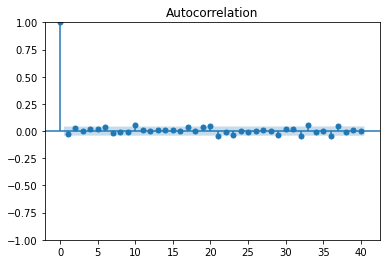

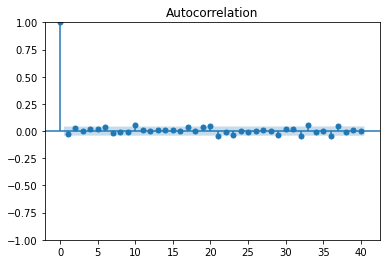

In [20]:
plot_acf(all_btc['Percent change'].dropna(), lags=40)

/Users/Teigen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


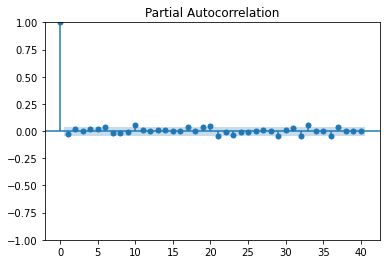

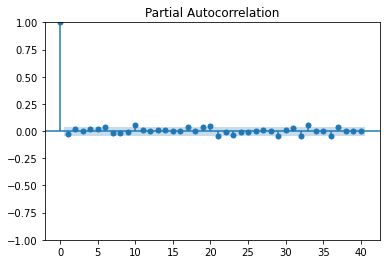

In [21]:
plot_pacf(all_btc['Percent change'].dropna(), lags=40)

In [25]:
from statsmodels.tsa.arima.model import ARIMA
first_model = ARIMA(all_btc['Percent change'], order=(1,1,1))
first_model_fit = first_model.fit()
first_model_fit.summary()

/Users/Teigen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/Teigen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/Teigen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Percent change   No. Observations:                 2193
Model:                 ARIMA(1, 1, 1)   Log Likelihood                3954.513
Date:                Tue, 30 Nov 2021   AIC                          -7903.026
Time:                        22:34:28   BIC                          -7885.948
Sample:                    11-21-2015   HQIC                         -7896.785
                         - 11-21-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0287      0.015     -1.965      0.049      -0.057   -7.89e-05
ma.L1         -1.0000      0.099    -10.065      0.000      -1.195      -0.805
sigma2         0.0016      0.000     10.348      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4924.90
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                            -0.14
Prob(H) (two-sided):                  0.01   Kurtosis:                        10.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
predictions = first_model_fit.predict(start=2180, end=2200, dynamic=True)
predictions

2021-11-09    0.001412
2021-11-10    0.003294
2021-11-11    0.003240
2021-11-12    0.003242
2021-11-13    0.003242
2021-11-14    0.003242
2021-11-15    0.003242
2021-11-16    0.003242
2021-11-17    0.003242
2021-11-18    0.003242
2021-11-19    0.003242
2021-11-20    0.003242
2021-11-21    0.003242
2021-11-22    0.003242
2021-11-23    0.003242
2021-11-24    0.003242
2021-11-25    0.003242
2021-11-26    0.003242
2021-11-27    0.003242
2021-11-28    0.003242
2021-11-29    0.003242
Freq: D, Name: predicted_mean, dtype: float64

In [27]:
all_btc.tail(20)

,Open,High,Low,Close,Adj Close,Volume,Percent change
Date,,,,,,,
2021-11-02,60963.253906,64242.792969,60673.054688,63226.402344,63226.402344,3.774667e+10,0.036424
2021-11-03,63254.335938,63516.937500,61184.238281,62970.046875,62970.046875,3.612473e+10,-0.004055
2021-11-04,62941.804688,63123.289063,60799.664063,61452.230469,61452.230469,3.261585e+10,-0.024104
2021-11-05,61460.078125,62541.468750,60844.609375,61125.675781,61125.675781,3.060510e+10,-0.005314
2021-11-06,61068.875000,61590.683594,60163.781250,61527.480469,61527.480469,2.909493e+10,0.006573
2021-11-07,61554.921875,63326.988281,61432.488281,63326.988281,63326.988281,2.472675e+10,0.029247
2021-11-08,63344.066406,67673.742188,63344.066406,67566.828125,67566.828125,4.112561e+10,0.066952
2021-11-09,67549.734375,68530.335938,66382.062500,66971.828125,66971.828125,4.235799e+10,-0.008806
2021-11-10,66953.335938,68789.625000,63208.113281,64995.230469,64995.230469,4.873083e+10,-0.029514
